In [1]:
import logging
from pathlib import Path

import pandas as pd
import numpy as np

from copairs.map import run_pipeline, aggregate

import seaborn as sns
from matplotlib import pyplot as plt

from tqdm.auto import tqdm

In [2]:
logging.basicConfig(format='%(levelname)s:%(asctime)s:%(name)s:%(message)s')
logging.getLogger("copairs").setLevel(logging.INFO)

In [3]:
subset_corrected = pd.read_parquet("../3.correct/output/subset_profiles_cc_corrected.parquet")
# subset_corrected.reset_index(inplace=True, drop=True)
subset_corrected

,Metadata_JCP2022,Metadata_broad_sample,Metadata_Name,Metadata_Vector,Metadata_Transcript,Metadata_Symbol,Metadata_NCBI_Gene_ID,Metadata_Taxon_ID,Metadata_Gene_Description,Metadata_Prot_Match,...,Nuclei_Texture_InfoMeas1_Mito_5_00_256,Nuclei_Texture_InfoMeas1_Mito_5_02_256,Nuclei_Texture_InfoMeas1_Mito_5_03_256,Nuclei_Texture_InfoMeas1_RNA_3_00_256,Nuclei_Texture_InfoMeas2_AGP_3_00_256,Nuclei_Texture_InfoMeas2_DNA_3_00_256,Nuclei_Texture_InfoMeas2_ER_3_00_256,Nuclei_Texture_InfoMeas2_Mito_3_00_256,Nuclei_Texture_SumVariance_AGP_5_01_256,Cells_Count
0,JCP2022_900008,ccsbBroad304_00010,ORF011294.1_TRC304.1,pLX_304,NM_001278352.1,ACO1,48,9606,aconitase 1,100.0,...,-0.186120,0.224393,-0.674491,-1.546098,0.149433,-0.620143,1.537437,0.094296,0.558373,1.016925
1,JCP2022_900034,ccsbBroad304_00038,ORF001874.1_TRC304.1,pLX_304,NM_000643.2,AGL,178,9606,"amylo-alpha-1, 6-glucosidase, 4-alpha-glucanot...",100.0,...,-0.156428,-0.704158,-1.218763,-1.639803,0.437437,-1.007869,1.701927,1.100106,1.412527,1.577271
2,JCP2022_900327,ccsbBroad304_00356,ORF005713.1_TRC304.1,pLX_304,NM_001304.5,CPD,1362,9606,carboxypeptidase D,100.0,...,-0.354677,-0.406209,-0.446483,-0.972917,1.158370,0.448857,0.724587,0.056280,0.536979,-0.352811
3,JCP2022_900417,ccsbBroad304_00448,ORF010275.1_TRC304.1,pLX_304,NM_021120.4,DLG3,1741,9606,discs large MAGUK scaffold protein 3,100.0,...,-4.617327,-0.611122,-0.356669,-0.268779,1.725261,0.982674,-0.543496,1.773940,-1.640721,-0.290550
4,JCP2022_900443,ccsbBroad304_00474,ORF014835.1_TRC304.1,pLX_304,NM_001258316.1,ECT2,1894,9606,epithelial cell transforming 2,100.0,...,-0.330817,-0.469409,-0.455415,0.184663,1.380698,1.208246,-0.224822,0.470515,-0.018334,-0.477332
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19138,JCP2022_915130,ccsbBroad304_99991,ORFC00003.1_TRC304.1,pLX_304,promegaLuc.1,LUCIFERASE,LUCIFERASE,CONTROL,promegaLuc,100.0,...,0.460429,0.254158,0.109740,-0.550101,0.248344,-0.589628,0.710816,-0.191293,0.755142,0.208088
19139,JCP2022_915131,ccsbBroad304_99994,ORFC00004.1_TRC304.1,pLX_304,LacZ.1,LacZ,LacZ,CONTROL,Hahn Lab LacZ,100.0,...,0.153905,1.002612,0.357619,0.250172,0.076972,1.129031,-0.120370,0.738204,0.343738,1.270052
19140,JCP2022_915131,ccsbBroad304_99994,ORFC00004.1_TRC304.1,pLX_304,LacZ.1,LacZ,LacZ,CONTROL,Hahn Lab LacZ,100.0,...,-0.290978,0.559867,0.534637,1.141291,-1.087403,0.860516,-1.058795,0.401875,-0.423379,1.076315
19141,JCP2022_915131,ccsbBroad304_99994,ORFC00004.1_TRC304.1,pLX_304,LacZ.1,LacZ,LacZ,CONTROL,Hahn Lab LacZ,100.0,...,0.622801,-0.451397,0.923011,-0.613694,0.396223,-0.354869,0.294841,-1.495372,-0.966784,-1.191122


In [4]:
subset_corrected.iloc[:, np.nonzero(((subset_corrected != subset_corrected.reset_index(drop=True)).any()).astype(int).to_list())[0]]

,Metadata_Transcript,Metadata_Gene_Description,Metadata_Prot_Match
0,NM_001278352.1,aconitase 1,100.0
1,NM_000643.2,"amylo-alpha-1, 6-glucosidase, 4-alpha-glucanot...",100.0
2,NM_001304.5,carboxypeptidase D,100.0
3,NM_021120.4,discs large MAGUK scaffold protein 3,100.0
4,NM_001258316.1,epithelial cell transforming 2,100.0
...,...,...,...
19138,promegaLuc.1,promegaLuc,100.0
19139,LacZ.1,Hahn Lab LacZ,100.0
19140,LacZ.1,Hahn Lab LacZ,100.0
19141,LacZ.1,Hahn Lab LacZ,100.0


In [5]:
# adding dummy index spped up calculations by skipping positive pairs between controls

subset_corrected["Metadata_dummy_index"] = subset_corrected.index
subset_corrected.loc[subset_corrected["Metadata_pert_type"] == "trt", "Metadata_dummy_index"] = -1
subset_corrected

,Metadata_JCP2022,Metadata_broad_sample,Metadata_Name,Metadata_Vector,Metadata_Transcript,Metadata_Symbol,Metadata_NCBI_Gene_ID,Metadata_Taxon_ID,Metadata_Gene_Description,Metadata_Prot_Match,...,Nuclei_Texture_InfoMeas1_Mito_5_02_256,Nuclei_Texture_InfoMeas1_Mito_5_03_256,Nuclei_Texture_InfoMeas1_RNA_3_00_256,Nuclei_Texture_InfoMeas2_AGP_3_00_256,Nuclei_Texture_InfoMeas2_DNA_3_00_256,Nuclei_Texture_InfoMeas2_ER_3_00_256,Nuclei_Texture_InfoMeas2_Mito_3_00_256,Nuclei_Texture_SumVariance_AGP_5_01_256,Cells_Count,Metadata_dummy_index
0,JCP2022_900008,ccsbBroad304_00010,ORF011294.1_TRC304.1,pLX_304,NM_001278352.1,ACO1,48,9606,aconitase 1,100.0,...,0.224393,-0.674491,-1.546098,0.149433,-0.620143,1.537437,0.094296,0.558373,1.016925,-1
1,JCP2022_900034,ccsbBroad304_00038,ORF001874.1_TRC304.1,pLX_304,NM_000643.2,AGL,178,9606,"amylo-alpha-1, 6-glucosidase, 4-alpha-glucanot...",100.0,...,-0.704158,-1.218763,-1.639803,0.437437,-1.007869,1.701927,1.100106,1.412527,1.577271,-1
2,JCP2022_900327,ccsbBroad304_00356,ORF005713.1_TRC304.1,pLX_304,NM_001304.5,CPD,1362,9606,carboxypeptidase D,100.0,...,-0.406209,-0.446483,-0.972917,1.158370,0.448857,0.724587,0.056280,0.536979,-0.352811,-1
3,JCP2022_900417,ccsbBroad304_00448,ORF010275.1_TRC304.1,pLX_304,NM_021120.4,DLG3,1741,9606,discs large MAGUK scaffold protein 3,100.0,...,-0.611122,-0.356669,-0.268779,1.725261,0.982674,-0.543496,1.773940,-1.640721,-0.290550,-1
4,JCP2022_900443,ccsbBroad304_00474,ORF014835.1_TRC304.1,pLX_304,NM_001258316.1,ECT2,1894,9606,epithelial cell transforming 2,100.0,...,-0.469409,-0.455415,0.184663,1.380698,1.208246,-0.224822,0.470515,-0.018334,-0.477332,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19138,JCP2022_915130,ccsbBroad304_99991,ORFC00003.1_TRC304.1,pLX_304,promegaLuc.1,LUCIFERASE,LUCIFERASE,CONTROL,promegaLuc,100.0,...,0.254158,0.109740,-0.550101,0.248344,-0.589628,0.710816,-0.191293,0.755142,0.208088,19138
19139,JCP2022_915131,ccsbBroad304_99994,ORFC00004.1_TRC304.1,pLX_304,LacZ.1,LacZ,LacZ,CONTROL,Hahn Lab LacZ,100.0,...,1.002612,0.357619,0.250172,0.076972,1.129031,-0.120370,0.738204,0.343738,1.270052,19139
19140,JCP2022_915131,ccsbBroad304_99994,ORFC00004.1_TRC304.1,pLX_304,LacZ.1,LacZ,LacZ,CONTROL,Hahn Lab LacZ,100.0,...,0.559867,0.534637,1.141291,-1.087403,0.860516,-1.058795,0.401875,-0.423379,1.076315,19140
19141,JCP2022_915131,ccsbBroad304_99994,ORFC00004.1_TRC304.1,pLX_304,LacZ.1,LacZ,LacZ,CONTROL,Hahn Lab LacZ,100.0,...,-0.451397,0.923011,-0.613694,0.396223,-0.354869,0.294841,-1.495372,-0.966784,-1.191122,19141


In [6]:
unique_trts = subset_corrected[subset_corrected.Metadata_pert_type=="trt"]["Metadata_JCP2022"].unique()
unique_trts

array(['JCP2022_900008', 'JCP2022_900034', 'JCP2022_900327', ...,
       'JCP2022_915125', 'JCP2022_915126', 'JCP2022_915127'], dtype=object)

In [7]:
metadata = subset_corrected.filter(regex="^Metadata_")
feature_values = subset_corrected.filter(regex="^(?!Metadata_)").values

In [8]:
pos_sameby = ["Metadata_JCP2022", "Metadata_dummy_index"]
pos_diffby = ["Metadata_Well"]

neg_sameby = []
neg_diffby = ["Metadata_pert_type"]

null_size = 10000

In [9]:
result = run_pipeline(
    metadata,
    feature_values, 
    pos_sameby,
    pos_diffby,
    neg_sameby,
    neg_diffby,
    null_size,
    batch_size=100000
)

INFO:2023-06-30 12:48:16,233:copairs:Indexing metadata...
INFO:2023-06-30 12:48:16,284:copairs:Finding positive pairs...
INFO:2023-06-30 12:48:16,584:copairs:dropping dups...
INFO:2023-06-30 12:48:16,587:copairs:Finding negative pairs...
INFO:2023-06-30 12:48:36,964:copairs:dropping dups...
INFO:2023-06-30 12:49:20,814:copairs:Computing positive similarities...


  0%|          | 0/1 [00:00<?, ?it/s]

INFO:2023-06-30 12:49:21,613:copairs:Computing negative similarities...


  0%|          | 0/161 [00:00<?, ?it/s]

INFO:2023-06-30 12:55:19,108:copairs:Building rank lists...
INFO:2023-06-30 12:55:39,558:copairs:Computing average precision...
INFO:2023-06-30 12:55:39,824:copairs:Computing null distributions...
/Users/akalinin/Projects/copairs/src/copairs/compute_np.py:107: RuntimeWarning: invalid value encountered in divide
  ap = (pr_k * rel_k).sum(axis=1) / num_pos
/Users/akalinin/Projects/copairs/src/copairs/compute_np.py:107: RuntimeWarning: invalid value encountered in divide
  ap = (pr_k * rel_k).sum(axis=1) / num_pos
/Users/akalinin/Projects/copairs/src/copairs/compute_np.py:107: RuntimeWarning: invalid value encountered in divide
  ap = (pr_k * rel_k).sum(axis=1) / num_pos
/Users/akalinin/Projects/copairs/src/copairs/compute_np.py:107: RuntimeWarning: invalid value encountered in divide
  ap = (pr_k * rel_k).sum(axis=1) / num_pos
INFO:2023-06-30 12:55:53,040:copairs:Computing P-values...
INFO:2023-06-30 12:55:53,137:copairs:Creating result DataFrame...
INFO:2023-06-30 12:55:53,144:copairs:F

In [10]:
result[0]

,Metadata_JCP2022,Metadata_broad_sample,Metadata_Name,Metadata_Vector,Metadata_Transcript,Metadata_Symbol,Metadata_NCBI_Gene_ID,Metadata_Taxon_ID,Metadata_Gene_Description,Metadata_Prot_Match,Metadata_Insert_Length,Metadata_pert_type,Metadata_Source,Metadata_Plate,Metadata_Well,Metadata_plate_map_name,Metadata_Batch,Metadata_dummy_index,p_value,average_precision
0,JCP2022_900008,ccsbBroad304_00010,ORF011294.1_TRC304.1,pLX_304,NM_001278352.1,ACO1,48,9606,aconitase 1,100.0,2667.0,trt,source_4,BR00117037,K06,OAB84.85.86.87.A,2021_04_26_Batch1,-1,0.0001,NaN
1,JCP2022_900034,ccsbBroad304_00038,ORF001874.1_TRC304.1,pLX_304,NM_000643.2,AGL,178,9606,"amylo-alpha-1, 6-glucosidase, 4-alpha-glucanot...",100.0,4596.0,trt,source_4,BR00117037,O03,OAB84.85.86.87.A,2021_04_26_Batch1,-1,0.0001,NaN
2,JCP2022_900327,ccsbBroad304_00356,ORF005713.1_TRC304.1,pLX_304,NM_001304.5,CPD,1362,9606,carboxypeptidase D,100.0,4140.0,trt,source_4,BR00117037,F09,OAB84.85.86.87.A,2021_04_26_Batch1,-1,0.0001,NaN
3,JCP2022_900417,ccsbBroad304_00448,ORF010275.1_TRC304.1,pLX_304,NM_021120.4,DLG3,1741,9606,discs large MAGUK scaffold protein 3,100.0,2451.0,trt,source_4,BR00117037,A19,OAB84.85.86.87.A,2021_04_26_Batch1,-1,0.0001,NaN
4,JCP2022_900443,ccsbBroad304_00474,ORF014835.1_TRC304.1,pLX_304,NM_001258316.1,ECT2,1894,9606,epithelial cell transforming 2,100.0,2649.0,trt,source_4,BR00117037,G18,OAB84.85.86.87.A,2021_04_26_Batch1,-1,0.0001,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19138,JCP2022_915130,ccsbBroad304_99991,ORFC00003.1_TRC304.1,pLX_304,promegaLuc.1,LUCIFERASE,LUCIFERASE,CONTROL,promegaLuc,100.0,1650.0,negcon,source_4,BR00126542,L04,OAB37.38.39.40.A,2021_08_09_Batch11,19138,0.0001,NaN
19139,JCP2022_915131,ccsbBroad304_99994,ORFC00004.1_TRC304.1,pLX_304,LacZ.1,LacZ,LacZ,CONTROL,Hahn Lab LacZ,100.0,3204.0,negcon,source_4,BR00126542,B15,OAB37.38.39.40.A,2021_08_09_Batch11,19139,0.0001,NaN
19140,JCP2022_915131,ccsbBroad304_99994,ORFC00004.1_TRC304.1,pLX_304,LacZ.1,LacZ,LacZ,CONTROL,Hahn Lab LacZ,100.0,3204.0,negcon,source_4,BR00126542,B20,OAB37.38.39.40.A,2021_08_09_Batch11,19140,0.0001,NaN
19141,JCP2022_915131,ccsbBroad304_99994,ORFC00004.1_TRC304.1,pLX_304,LacZ.1,LacZ,LacZ,CONTROL,Hahn Lab LacZ,100.0,3204.0,negcon,source_4,BR00126542,E12,OAB37.38.39.40.A,2021_08_09_Batch11,19141,0.0001,NaN


In [11]:
result[0][result[0].Metadata_JCP2022=="JCP2022_900041"]

,Metadata_JCP2022,Metadata_broad_sample,Metadata_Name,Metadata_Vector,Metadata_Transcript,Metadata_Symbol,Metadata_NCBI_Gene_ID,Metadata_Taxon_ID,Metadata_Gene_Description,Metadata_Prot_Match,Metadata_Insert_Length,Metadata_pert_type,Metadata_Source,Metadata_Plate,Metadata_Well,Metadata_plate_map_name,Metadata_Batch,Metadata_dummy_index,p_value,average_precision
6670,JCP2022_900041,ccsbBroad304_00047,ORF007322.1_TRC304.1,pLX_304,NM_001626.6,AKT2,208,9606,AKT serine/threonine kinase 2,58.7,1450.0,trt,source_4,BR00123945,F08,OKA05.06.07.08.A,2021_06_14_Batch6,-1,0.629637,0.006869
8794,JCP2022_900041,ccsbBroad304_00047,ORF007322.1_TRC304.1,pLX_304,NM_001626.6,AKT2,208,9606,AKT serine/threonine kinase 2,58.7,1450.0,trt,source_4,BR00124766,F08,OKA05.06.07.08.A,2021_06_14_Batch6,-1,0.214779,0.013452
9148,JCP2022_900041,ccsbBroad304_00047,ORF007322.1_TRC304.1,pLX_304,NM_001626.6,AKT2,208,9606,AKT serine/threonine kinase 2,58.7,1450.0,trt,source_4,BR00124767,F08,OKA05.06.07.08.A,2021_06_14_Batch6,-1,0.636036,0.006809
9502,JCP2022_900041,ccsbBroad304_00047,ORF007322.1_TRC304.1,pLX_304,NM_001626.6,AKT2,208,9606,AKT serine/threonine kinase 2,58.7,1450.0,trt,source_4,BR00124768,F08,OKA05.06.07.08.A,2021_06_14_Batch6,-1,0.695730,0.006360
9856,JCP2022_900041,ccsbBroad304_00047,ORF007322.1_TRC304.1,pLX_304,NM_001626.6,AKT2,208,9606,AKT serine/threonine kinase 2,58.7,1450.0,trt,source_4,BR00124769,F08,OKA05.06.07.08.A,2021_06_14_Batch6,-1,0.625837,0.006843
10921,JCP2022_900041,ccsbBroad304_00047,ORF007322.1_TRC304.1,pLX_304,NM_001626.6,AKT2,208,9606,AKT serine/threonine kinase 2,58.7,1450.0,trt,source_4,BR00124787,H13,OAA85.86.87.88.A,2021_07_12_Batch8,-1,0.653835,0.006668
11281,JCP2022_900041,ccsbBroad304_00047,ORF007322.1_TRC304.1,pLX_304,NM_001626.6,AKT2,208,9606,AKT serine/threonine kinase 2,58.7,1450.0,trt,source_4,BR00124788,H13,OAA85.86.87.88.A,2021_07_12_Batch8,-1,0.411559,0.008993
12703,JCP2022_900041,ccsbBroad304_00047,ORF007322.1_TRC304.1,pLX_304,NM_001626.6,AKT2,208,9606,AKT serine/threonine kinase 2,58.7,1450.0,trt,source_4,BR00125619,H13,OAA85.86.87.88.A,2021_07_12_Batch8,-1,0.368063,0.009529
13062,JCP2022_900041,ccsbBroad304_00047,ORF007322.1_TRC304.1,pLX_304,NM_001626.6,AKT2,208,9606,AKT serine/threonine kinase 2,58.7,1450.0,trt,source_4,BR00125620,H13,OAA85.86.87.88.A,2021_07_12_Batch8,-1,0.520948,0.007702
13422,JCP2022_900041,ccsbBroad304_00047,ORF007322.1_TRC304.1,pLX_304,NM_001626.6,AKT2,208,9606,AKT serine/threonine kinase 2,58.7,1450.0,trt,source_4,BR00125621,H13,OAA85.86.87.88.A,2021_07_12_Batch8,-1,0.137486,0.017566


In [12]:
result[1]

,0,1,ix1,ix2,dist
0,JCP2022_900041,-1,9856,13062,0.011024
1,JCP2022_900041,-1,9856,10921,-0.011327
2,JCP2022_900041,-1,9856,13422,0.999120
3,JCP2022_900041,-1,9856,11281,0.000957
4,JCP2022_900041,-1,9856,12703,-0.032901
...,...,...,...,...,...
920,JCP2022_914534,-1,10184,13023,0.051860
921,JCP2022_914534,-1,11242,6998,0.008324
922,JCP2022_914534,-1,13742,6998,-0.014552
923,JCP2022_914534,-1,11602,6998,-0.166043


In [13]:
result[1][result[1][0] == "JCP2022_900041"]["dist"].sort_values()

8    -0.117011
4    -0.032901
15   -0.031993
23   -0.030149
16   -0.021925
18   -0.015903
11   -0.013820
1    -0.011327
10   -0.010821
20    0.000743
3     0.000957
13    0.001527
7     0.010838
0     0.011024
6     0.011780
12    0.013397
21    0.018400
19    0.029475
9     0.063526
5     0.084091
24    0.118581
22    0.136681
2     0.999120
17    0.999202
14    0.999249
Name: dist, dtype: float64

In [14]:
collatedsim = pd.read_parquet("../2.evalzoo/results/df015b9f/collatedsim.parquet")
collatedsim_jcp41 = collatedsim[collatedsim.Metadata_JCP2022=="JCP2022_900041"]

# note sampling every other row to get rid of duplicates
cs_sim_jcp41 = collatedsim_jcp41[collatedsim_jcp41.type=="rep"]["sim"].sort_values()[::2].reset_index(drop=True)

In [15]:
collatedsim_jcp41[(collatedsim_jcp41.Metadata_Well == "F08") & (collatedsim_jcp41.type=="rep")]

,id1,id2,Metadata_JCP2022,Metadata_Well,Metadata_Plate,Metadata_reference_or_other,type,sim
25,7251,11290,JCP2022_900041,F08,BR00123945,pert,rep,-0.013820
26,9275,11290,JCP2022_900041,F08,BR00124766,pert,rep,0.063526
27,9609,11290,JCP2022_900041,F08,BR00124767,pert,rep,-0.010821
28,9943,11290,JCP2022_900041,F08,BR00124768,pert,rep,0.013397
29,10277,11290,JCP2022_900041,F08,BR00124769,pert,rep,-0.011327
30,7251,11634,JCP2022_900041,F08,BR00123945,pert,rep,0.001527
31,9275,11634,JCP2022_900041,F08,BR00124766,pert,rep,0.029475
32,9609,11634,JCP2022_900041,F08,BR00124767,pert,rep,0.000743
33,9943,11634,JCP2022_900041,F08,BR00124768,pert,rep,0.018400
34,10277,11634,JCP2022_900041,F08,BR00124769,pert,rep,0.000957


In [16]:
profiles = pd.read_parquet("../2.evalzoo/results/df015b9f/profiles.parquet")
profiles = profiles.filter(regex="^(Metadata_)")
profiles

,Metadata_pert_type,Metadata_reference_or_other,Metadata_JCP2022,Metadata_broad_sample,Metadata_Name,Metadata_Vector,Metadata_Transcript,Metadata_Symbol,Metadata_NCBI_Gene_ID,Metadata_Taxon_ID,Metadata_Gene_Description,Metadata_Prot_Match,Metadata_Insert_Length,Metadata_Source,Metadata_Plate,Metadata_Well,Metadata_plate_map_name,Metadata_Batch,Metadata_dummy
0,negcon,reference,JCP2022_915128,ccsbBroad304_99985,ORFC00001.1_TRC304.1,pLX_304,BFP.1,BFP,BFP,CONTROL,Hahn Lab BFP,99.5,717.0,source_4,BR00117037,G13,OAB84.85.86.87.A,2021_04_26_Batch1,0.0
1,negcon,reference,JCP2022_915128,ccsbBroad304_99985,ORFC00001.1_TRC304.1,pLX_304,BFP.1,BFP,BFP,CONTROL,Hahn Lab BFP,99.5,717.0,source_4,BR00117037,G14,OAB84.85.86.87.A,2021_04_26_Batch1,0.0
2,negcon,reference,JCP2022_915128,ccsbBroad304_99985,ORFC00001.1_TRC304.1,pLX_304,BFP.1,BFP,BFP,CONTROL,Hahn Lab BFP,99.5,717.0,source_4,BR00117037,H13,OAB84.85.86.87.A,2021_04_26_Batch1,0.0
3,negcon,reference,JCP2022_915128,ccsbBroad304_99985,ORFC00001.1_TRC304.1,pLX_304,BFP.1,BFP,BFP,CONTROL,Hahn Lab BFP,99.5,717.0,source_4,BR00117037,H14,OAB84.85.86.87.A,2021_04_26_Batch1,0.0
4,negcon,reference,JCP2022_915129,ccsbBroad304_99988,ORFC00002.1_TRC304.1,pLX_304,HcRed.1,HcRed,HcRed,CONTROL,None,NaN,824.0,source_4,BR00117037,E11,OAB84.85.86.87.A,2021_04_26_Batch1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19138,trt,pert,JCP2022_915106,ccsbBroad304_16151,ORF015124.1_TRC304.1,pLX_304,NM_173660.5,DOK7,285489,9606,docking protein 7,99.8,1512.0,source_4,BR00126542,G14,OAB37.38.39.40.A,2021_08_09_Batch11,0.0
19139,trt,pert,JCP2022_915108,ccsbBroad304_16153,ORF011544.1_TRC304.1,pLX_304,NM_152616.5,TRIM42,287015,9606,tripartite motif containing 42,99.5,2169.0,source_4,BR00126542,B07,OAB37.38.39.40.A,2021_08_09_Batch11,0.0
19140,trt,pert,JCP2022_915125,ccsbBroad304_16170,ORF004157.1_TRC304.1,pLX_304,NM_001368080.1,GOLGA8G,283768,9606,golgin A8 family member G,98.3,1290.0,source_4,BR00126542,H23,OAB37.38.39.40.A,2021_08_09_Batch11,0.0
19141,trt,pert,JCP2022_915126,ccsbBroad304_16171,ORF015612.1_TRC304.1,pLX_304,NM_001167670.3,TMEM239,100288797,9606,transmembrane protein 239,99.3,453.0,source_4,BR00126542,B04,OAB37.38.39.40.A,2021_08_09_Batch11,0.0


<Axes: >

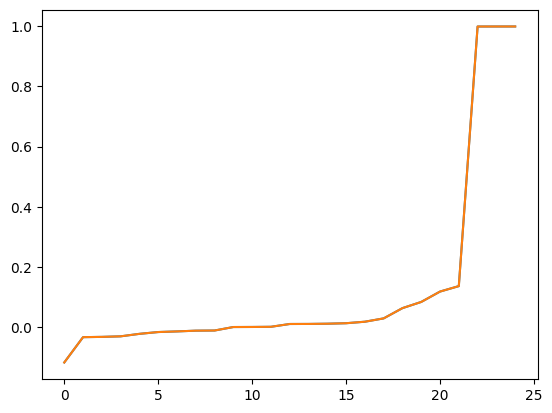

In [17]:
# collatedsim[collatedsim.type=="rep"]["sim"].sort_values().reset_index(drop=True)[::2].plot()
cs_sim_jcp41.plot()
result[1][result[1][0] == "JCP2022_900041"]["dist"].sort_values().reset_index(drop=True).plot()

In [18]:
# select rows from result[2] where either ix1 or ix2 is in index of result[0][result[0].Metadata_JCP2022=="JCP2022_900041"]

coparis_jcp41_rep_idx = result[0][result[0].Metadata_JCP2022=="JCP2022_900041"].index
coparis_jcp41_ref_sim = result[2][result[2].ix1.isin(coparis_jcp41_rep_idx) | result[2].ix2.isin(coparis_jcp41_rep_idx)]
coparis_jcp41_ref_sim

,ix1,ix2,dist
119,2289,10921,0.255351
4098,13417,10921,0.034392
4354,11271,9502,-0.052064
5599,2557,13422,0.999257
11154,15906,6670,-0.026427
...,...,...,...
16064556,11272,8794,-0.142788
16065589,15911,8794,-0.043743
16065990,8428,11281,0.013782
16069563,5235,6670,-0.010371


In [19]:
rep_sim = collatedsim_jcp41[collatedsim_jcp41.type=="rep"].sort_values("sim").reset_index(drop=True)
rep_sim.groupby("sim").count()

,id1,id2,Metadata_JCP2022,Metadata_Well,Metadata_Plate,Metadata_reference_or_other,type
sim,,,,,,,
-0.117011,2,2,2,2,2,2,2
-0.032901,2,2,2,2,2,2,2
-0.031993,2,2,2,2,2,2,2
-0.030149,2,2,2,2,2,2,2
-0.021925,2,2,2,2,2,2,2
-0.015903,2,2,2,2,2,2,2
-0.013820,2,2,2,2,2,2,2
-0.011327,2,2,2,2,2,2,2
-0.010821,2,2,2,2,2,2,2


In [20]:
rep_sim[::2].groupby("sim").count()

,id1,id2,Metadata_JCP2022,Metadata_Well,Metadata_Plate,Metadata_reference_or_other,type
sim,,,,,,,
-0.117011,1,1,1,1,1,1,1
-0.032901,1,1,1,1,1,1,1
-0.031993,1,1,1,1,1,1,1
-0.030149,1,1,1,1,1,1,1
-0.021925,1,1,1,1,1,1,1
-0.015903,1,1,1,1,1,1,1
-0.013820,1,1,1,1,1,1,1
-0.011327,1,1,1,1,1,1,1
-0.010821,1,1,1,1,1,1,1


In [21]:
rep_sim_copair = rep_sim[::2].loc[:, ["id1", "id2", "sim"]]
rep_sim_copair.columns = ["ix1", "ix2", "dist"]
rep_sim_copair

,ix1,ix2,dist
0,9943,13335,-0.117011
2,10277,12992,-0.032901
4,12992,7251,-0.031993
6,9609,12992,-0.030149
8,9275,13679,-0.021925
10,9943,13679,-0.015903
12,7251,11290,-0.013820
14,11290,10277,-0.011327
16,11290,9609,-0.010821
18,11634,9609,0.000743


In [22]:
collatedsim_jcp41[collatedsim_jcp41.type=="ref"].groupby("sim").count()

,id1,id2,Metadata_JCP2022,Metadata_Well,Metadata_Plate,Metadata_reference_or_other,type
sim,,,,,,,
-0.484082,1,1,1,1,1,1,1
-0.427326,1,1,1,1,1,1,1
-0.424173,1,1,1,1,1,1,1
-0.394444,1,1,1,1,1,1,1
-0.372776,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...
0.999811,1,1,1,1,1,1,1
0.999813,1,1,1,1,1,1,1
0.999830,1,1,1,1,1,1,1


In [23]:
ref_sim = collatedsim_jcp41[collatedsim_jcp41.type=="ref"].sort_values("sim").reset_index(drop=True)
ref_sim

,id1,id2,Metadata_JCP2022,Metadata_Well,Metadata_Plate,Metadata_reference_or_other,type,sim
0,12992,523,JCP2022_900041,H13,BR00125619,pert,ref,-0.484082
1,13335,755,JCP2022_900041,H13,BR00125620,pert,ref,-0.427326
2,12992,92,JCP2022_900041,H13,BR00125619,pert,ref,-0.424173
3,13335,382,JCP2022_900041,H13,BR00125620,pert,ref,-0.394444
4,12992,195,JCP2022_900041,H13,BR00125619,pert,ref,-0.372776
...,...,...,...,...,...,...,...,...
8795,9609,831,JCP2022_900041,F08,BR00124767,pert,ref,0.999811
8796,7251,33,JCP2022_900041,F08,BR00123945,pert,ref,0.999813
8797,7251,832,JCP2022_900041,F08,BR00123945,pert,ref,0.999830
8798,9609,424,JCP2022_900041,F08,BR00124767,pert,ref,0.999833


In [24]:
ref_sim_2_copair = ref_sim.loc[:, ["id1", "id2", "sim"]]
ref_sim_2_copair.columns = ["ix1", "ix2", "dist"]
ref_sim_2_copair

,ix1,ix2,dist
0,12992,523,-0.484082
1,13335,755,-0.427326
2,12992,92,-0.424173
3,13335,382,-0.394444
4,12992,195,-0.372776
...,...,...,...
8795,9609,831,0.999811
8796,7251,33,0.999813
8797,7251,832,0.999830
8798,9609,424,0.999833


<Axes: >

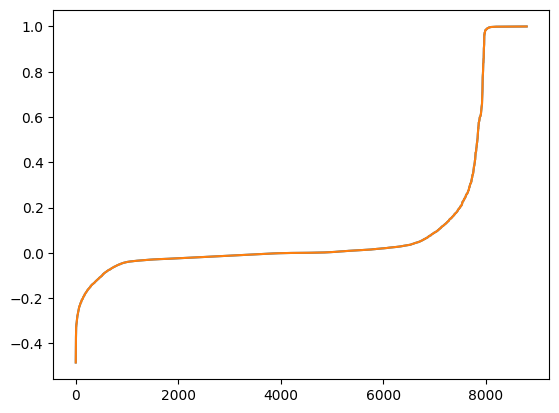

In [25]:
coparis_jcp41_ref_sim.dist.sort_values().reset_index(drop=True).plot()
ref_sim_2_copair.dist.sort_values().reset_index(drop=True).plot()

In [26]:
# check that coparis_jcp41_ref_sim.dist and ref_sim_2_copair.dist have same values

np.allclose(coparis_jcp41_ref_sim.dist.sort_values().reset_index(drop=True), ref_sim_2_copair.dist.sort_values().reset_index(drop=True))


True

In [27]:
from copairs.compute_np import compute_ap
from copairs.map import build_rank_lists

In [28]:
rank_lists = build_rank_lists(rep_sim_copair, ref_sim_2_copair)
rank_lists

ix
1                         [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]
2                         [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]
3                         [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]
4                         [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]
5                         [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]
                               ...                        
11290    [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
11634    [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
12992    [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
13335    [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
13679    [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
Name: label, Length: 890, dtype: object

In [29]:
ap_scores = rank_lists.apply(compute_ap)
ap_scores = np.concatenate(ap_scores.values)
ap_scores

array([       nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        

In [30]:
np.nanmean(ap_scores) 

0.009079205005241403

In [31]:
result[0][result[0].Metadata_JCP2022=="JCP2022_900041"].average_precision.mean()

0.009079205005241403

In [32]:
collatedsim_jcp41.sort_values("sim", ascending=True).reset_index(drop=True)["sim"]
# add a line for the threshold at 0 on y axis
# plt.axhline(y=0, color='r', linestyle='--')

0      -0.484082
1      -0.427326
2      -0.424173
3      -0.394444
4      -0.372776
          ...   
8845    0.999811
8846    0.999813
8847    0.999830
8848    0.999833
8849    0.999834
Name: sim, Length: 8850, dtype: float64

In [33]:
agg_result = aggregate(result[0], sameby="Metadata_JCP2022", threshold=0.05)
agg_result

,Metadata_JCP2022,average_precision,nlog10pvalue,q_value,nlog10qvalue,above_p_threshold,above_q_threshold
0,JCP2022_900006,NaN,4.000043,0.000101,3.995582,True,True
1,JCP2022_900008,NaN,4.000043,0.000101,3.995582,True,True
2,JCP2022_900012,NaN,4.000043,0.000101,3.995582,True,True
3,JCP2022_900014,NaN,4.000043,0.000101,3.995582,True,True
4,JCP2022_900015,NaN,4.000043,0.000101,3.995582,True,True
...,...,...,...,...,...,...,...
3615,JCP2022_915127,NaN,4.000043,0.000101,3.995582,True,True
3616,JCP2022_915128,NaN,4.000043,0.000101,3.995582,True,True
3617,JCP2022_915129,NaN,4.000043,0.000101,3.995582,True,True
3618,JCP2022_915130,NaN,4.000043,0.000101,3.995582,True,True


In [34]:
agg_result_trt = agg_result[(~agg_result.average_precision.isnull()) & (agg_result.Metadata_JCP2022.isin(unique_trts))]
agg_result_trt

,Metadata_JCP2022,average_precision,nlog10pvalue,q_value,nlog10qvalue,above_p_threshold,above_q_threshold
12,JCP2022_900041,0.009079,0.357566,0.440796,0.355763,False,False
58,JCP2022_900288,0.020139,0.857242,0.140079,0.853628,False,False
108,JCP2022_900475,0.009853,0.376136,0.422462,0.374212,False,False
164,JCP2022_900832,0.010626,0.444727,0.361343,0.442080,False,False
221,JCP2022_901127,0.007863,0.216155,0.609264,0.215195,False,False
700,JCP2022_903189,0.007582,0.256303,0.555928,0.254981,False,False
1084,JCP2022_904840,0.006771,0.204028,0.626344,0.203187,False,False
1189,JCP2022_905399,0.019687,0.586644,0.260762,0.583755,False,False
1272,JCP2022_905771,0.012932,0.394991,0.404626,0.392946,False,False
1420,JCP2022_906380,0.053348,0.856480,0.140285,0.852987,False,False


In [35]:
p_value = agg_result_trt['above_p_threshold']
print(
    f"mmAP: {agg_result_trt.average_precision.mean():.03}",
    f"p<0.05: {p_value.mean():.03} ({p_value.sum()}/{p_value.shape[0]})",
    )

mmAP: 0.0314 p<0.05: 0.0541 (2/37)


<Axes: xlabel='average_precision', ylabel='nlog10pvalue'>

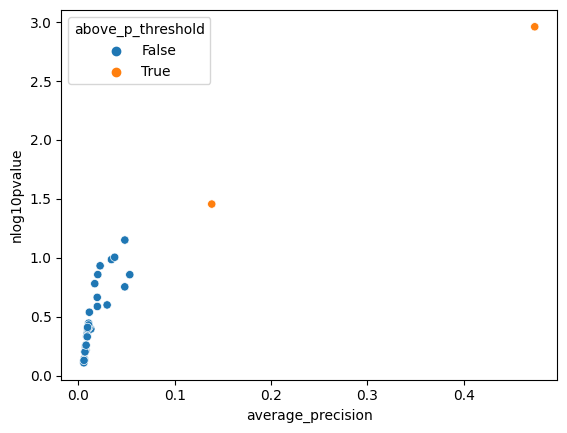

In [36]:
sns.scatterplot(data=agg_result_trt, x="average_precision", y="nlog10pvalue", hue="above_p_threshold")
# sns.kdeplot(data=subset_df, x=x_col, hue=hue_col, ax=ax_kde, legend=False)

In [37]:
# evalzoo_l1 = pd.read_parquet("../2.evalzoo/results/d2311b58/metrics_level_1_ref.parquet")
evalzoo_l1 = pd.read_parquet("../2.evalzoo/results/df015b9f/metrics_level_1_ref.parquet")
evalzoo_l1.drop_duplicates(subset="Metadata_JCP2022", inplace=True)
evalzoo_l1

,Metadata_JCP2022,Metadata_reference_or_other,Metadata_Well,Metadata_Plate,sim_scaled_mean_ref_i_mean_i,sim_scaled_mean_ref_i_median_i,sim_scaled_median_ref_i_mean_i,sim_scaled_median_ref_i_median_i,sim_ranked_relrank_mean_ref_i_mean_i,sim_ranked_relrank_mean_ref_i_median_i,...,sim_stat_signal_n_ref_i_median_i,sim_stat_background_n_ref_i_mean_i,sim_stat_background_n_ref_i_median_i,sim_retrieval_average_precision_ref_i_mean_i,sim_retrieval_average_precision_ref_i_median_i,sim_retrieval_r_precision_ref_i_mean_i,sim_retrieval_r_precision_ref_i_median_i,sim_retrieval_average_precision_ref_i_nlog10pvalue_mean_i,sim_retrieval_average_precision_ref_i_nlog10pvalue_median_i,sim_retrieval_average_precision_ref_i_nlog10qvalue_mean_i
0,JCP2022_900041,pert,F08,BR00123945,0.068172,-0.111062,-0.027562,-0.277915,0.449727,0.469318,...,5.0,880.0,880.0,0.009079,0.007286,0.00,0.0,0.370045,0.250265,0.153727
10,JCP2022_900288,pert,G21,BR00121552,0.595482,0.732427,0.407516,0.254278,0.303432,0.295227,...,5.0,880.0,880.0,0.020139,0.019886,0.00,0.0,0.874696,0.955251,0.197204
20,JCP2022_900475,pert,L13,BR00117037,0.102086,-0.011108,-0.259631,-0.215829,0.476341,0.518977,...,5.0,880.0,880.0,0.009853,0.007104,0.00,0.0,0.386745,0.232557,0.153727
30,JCP2022_900832,pert,P04,BR00123945,0.045801,-0.085382,-0.223172,-0.190275,0.450614,0.431250,...,5.0,880.0,880.0,0.010626,0.008830,0.00,0.0,0.454594,0.383568,0.153727
40,JCP2022_901127,pert,B06,BR00117037,-0.280744,-0.281401,-0.388459,-0.415523,0.616273,0.602841,...,5.0,880.0,880.0,0.007863,0.005662,0.00,0.0,0.222998,0.105520,0.133117
50,JCP2022_903189,pert,J04,BR00123945,-0.092793,-0.179073,-0.266321,-0.248007,0.575182,0.553523,...,5.0,880.0,880.0,0.007582,0.007091,0.00,0.0,0.265592,0.232868,0.133117
60,JCP2022_904840,pert,B08,BR00123945,-0.493006,-0.521786,-0.644904,-0.602163,0.596977,0.658636,...,5.0,880.0,880.0,0.006771,0.005790,0.00,0.0,0.209957,0.115116,0.133117
70,JCP2022_905399,pert,F02,BR00123945,-0.064786,-0.059868,-0.423011,-0.448727,0.524705,0.507841,...,5.0,880.0,880.0,0.019687,0.011467,0.02,0.0,0.593829,0.578080,0.153727
80,JCP2022_905771,pert,H13,BR00123613,-0.083759,-0.137093,-0.371884,-0.377906,0.583682,0.591705,...,5.0,880.0,880.0,0.012932,0.006819,0.02,0.0,0.403646,0.208470,0.153727
90,JCP2022_906380,pert,F23,BR00117037,0.139909,0.072377,0.068679,-0.230422,0.515295,0.540795,...,5.0,880.0,880.0,0.053348,0.009061,0.04,0.0,0.862316,0.375695,0.197204


In [38]:
jcp_diff = list(set(agg_result_trt.Metadata_JCP2022.unique()).symmetric_difference(set(evalzoo_l1.Metadata_JCP2022.unique())))
jcp_diff

[]

In [39]:
# merge agg_result_trt and evalzoo_l1

merged = pd.merge(agg_result_trt, evalzoo_l1, on="Metadata_JCP2022", how="inner")
merged

,Metadata_JCP2022,average_precision,nlog10pvalue,q_value,nlog10qvalue,above_p_threshold,above_q_threshold,Metadata_reference_or_other,Metadata_Well,Metadata_Plate,...,sim_stat_signal_n_ref_i_median_i,sim_stat_background_n_ref_i_mean_i,sim_stat_background_n_ref_i_median_i,sim_retrieval_average_precision_ref_i_mean_i,sim_retrieval_average_precision_ref_i_median_i,sim_retrieval_r_precision_ref_i_mean_i,sim_retrieval_r_precision_ref_i_median_i,sim_retrieval_average_precision_ref_i_nlog10pvalue_mean_i,sim_retrieval_average_precision_ref_i_nlog10pvalue_median_i,sim_retrieval_average_precision_ref_i_nlog10qvalue_mean_i
0,JCP2022_900041,0.009079,0.357566,0.440796,0.355763,False,False,pert,F08,BR00123945,...,5.0,880.0,880.0,0.009079,0.007286,0.00,0.0,0.370045,0.250265,0.153727
1,JCP2022_900288,0.020139,0.857242,0.140079,0.853628,False,False,pert,G21,BR00121552,...,5.0,880.0,880.0,0.020139,0.019886,0.00,0.0,0.874696,0.955251,0.197204
2,JCP2022_900475,0.009853,0.376136,0.422462,0.374212,False,False,pert,L13,BR00117037,...,5.0,880.0,880.0,0.009853,0.007104,0.00,0.0,0.386745,0.232557,0.153727
3,JCP2022_900832,0.010626,0.444727,0.361343,0.442080,False,False,pert,P04,BR00123945,...,5.0,880.0,880.0,0.010626,0.008830,0.00,0.0,0.454594,0.383568,0.153727
4,JCP2022_901127,0.007863,0.216155,0.609264,0.215195,False,False,pert,B06,BR00117037,...,5.0,880.0,880.0,0.007863,0.005662,0.00,0.0,0.222998,0.105520,0.133117
5,JCP2022_903189,0.007582,0.256303,0.555928,0.254981,False,False,pert,J04,BR00123945,...,5.0,880.0,880.0,0.007582,0.007091,0.00,0.0,0.265592,0.232868,0.133117
6,JCP2022_904840,0.006771,0.204028,0.626344,0.203187,False,False,pert,B08,BR00123945,...,5.0,880.0,880.0,0.006771,0.005790,0.00,0.0,0.209957,0.115116,0.133117
7,JCP2022_905399,0.019687,0.586644,0.260762,0.583755,False,False,pert,F02,BR00123945,...,5.0,880.0,880.0,0.019687,0.011467,0.02,0.0,0.593829,0.578080,0.153727
8,JCP2022_905771,0.012932,0.394991,0.404626,0.392946,False,False,pert,H13,BR00123613,...,5.0,880.0,880.0,0.012932,0.006819,0.02,0.0,0.403646,0.208470,0.153727
9,JCP2022_906380,0.053348,0.856480,0.140285,0.852987,False,False,pert,F23,BR00117037,...,5.0,880.0,880.0,0.053348,0.009061,0.04,0.0,0.862316,0.375695,0.197204


<Axes: xlabel='sim_retrieval_average_precision_ref_i_mean_i', ylabel='average_precision'>

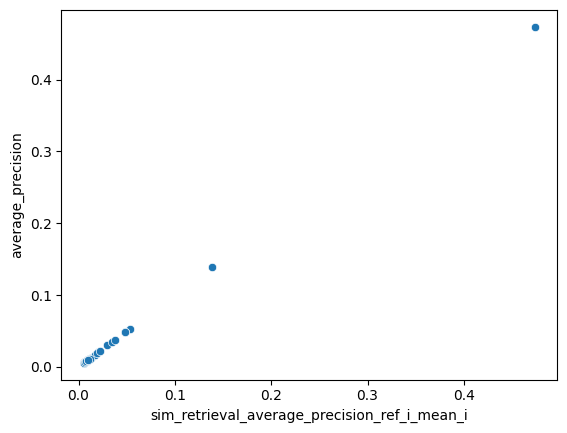

In [40]:
# plot sim_retrieval_average_precision_ref_i_mean_i vs average_precision
sns.scatterplot(data=merged, x="sim_retrieval_average_precision_ref_i_mean_i", y="average_precision")

In [41]:
l_0_1 = pd.read_parquet("../2.evalzoo/results/df015b9f/metrics_level_1_0_ref.parquet")
l_0_1[l_0_1.Metadata_JCP2022=="JCP2022_900041"].sim_retrieval_average_precision_ref_i.sort_values().to_list()

[0.006360446800524217,
 0.006667791920889951,
 0.0068090672378466445,
 0.006843164742108167,
 0.006869492352513827,
 0.007701607145102104,
 0.008993166602259278,
 0.009529238096155123,
 0.013452050737109013,
 0.017566024417905685]

In [42]:
sorted(ap_scores[~np.isnan(ap_scores)])

[0.006360446800524217,
 0.006667791920889951,
 0.0068090672378466445,
 0.006843164742108168,
 0.006869492352513826,
 0.007701607145102103,
 0.008993166602259278,
 0.009529238096155123,
 0.013452050737109015,
 0.01756602441790569]

#### check specific replicate

In [43]:
copairs_rep_id = 8794
result[0].loc[copairs_rep_id, "average_precision"]

0.013452050737109015

In [44]:
copairs_rep_sim = result[1][(result[1].ix1 == copairs_rep_id) | (result[1].ix2 == copairs_rep_id)].dist.sort_values()
copairs_rep_sim

16   -0.021925
19    0.029475
9     0.063526
5     0.084091
22    0.136681
Name: dist, dtype: float64

In [45]:
copairs_ref_sim = result[2][(result[2].ix1==copairs_rep_id) | (result[2].ix2==copairs_rep_id)].dist.sort_values()
copairs_ref_sim

9957443    -0.287505
14996697   -0.275815
5437810    -0.273026
2774121    -0.260080
10054110   -0.254270
              ...   
12132628    0.359315
11677571    0.394089
9988242     0.471311
9525747     0.580794
7255957     0.620313
Name: dist, Length: 880, dtype: float64

In [46]:
profiles[
    (profiles.Metadata_JCP2022=="JCP2022_900041") &
    (profiles.Metadata_Well=="F08")
]

,Metadata_pert_type,Metadata_reference_or_other,Metadata_JCP2022,Metadata_broad_sample,Metadata_Name,Metadata_Vector,Metadata_Transcript,Metadata_Symbol,Metadata_NCBI_Gene_ID,Metadata_Taxon_ID,Metadata_Gene_Description,Metadata_Prot_Match,Metadata_Insert_Length,Metadata_Source,Metadata_Plate,Metadata_Well,Metadata_plate_map_name,Metadata_Batch,Metadata_dummy
7250,trt,pert,JCP2022_900041,ccsbBroad304_00047,ORF007322.1_TRC304.1,pLX_304,NM_001626.6,AKT2,208,9606,AKT serine/threonine kinase 2,58.7,1450.0,source_4,BR00123945,F08,OKA05.06.07.08.A,2021_06_14_Batch6,0.0
9274,trt,pert,JCP2022_900041,ccsbBroad304_00047,ORF007322.1_TRC304.1,pLX_304,NM_001626.6,AKT2,208,9606,AKT serine/threonine kinase 2,58.7,1450.0,source_4,BR00124766,F08,OKA05.06.07.08.A,2021_06_14_Batch6,0.0
9608,trt,pert,JCP2022_900041,ccsbBroad304_00047,ORF007322.1_TRC304.1,pLX_304,NM_001626.6,AKT2,208,9606,AKT serine/threonine kinase 2,58.7,1450.0,source_4,BR00124767,F08,OKA05.06.07.08.A,2021_06_14_Batch6,0.0
9942,trt,pert,JCP2022_900041,ccsbBroad304_00047,ORF007322.1_TRC304.1,pLX_304,NM_001626.6,AKT2,208,9606,AKT serine/threonine kinase 2,58.7,1450.0,source_4,BR00124768,F08,OKA05.06.07.08.A,2021_06_14_Batch6,0.0
10276,trt,pert,JCP2022_900041,ccsbBroad304_00047,ORF007322.1_TRC304.1,pLX_304,NM_001626.6,AKT2,208,9606,AKT serine/threonine kinase 2,58.7,1450.0,source_4,BR00124769,F08,OKA05.06.07.08.A,2021_06_14_Batch6,0.0


In [47]:
evalzoo_rep_id = profiles[
    (profiles.Metadata_JCP2022=="JCP2022_900041") &
    (profiles.Metadata_Well=="F08") &
    (profiles.Metadata_Plate=="BR00124766")
].index[0] + 1
evalzoo_rep_id

9275

In [48]:
evalzoo_rep_sim = rep_sim_copair[(rep_sim_copair.ix1 == evalzoo_rep_id) | (rep_sim_copair.ix2 == evalzoo_rep_id)].dist.sort_values()
evalzoo_rep_sim

8    -0.021925
34    0.029475
36    0.063526
38    0.084091
42    0.136681
Name: dist, dtype: float64

In [49]:
evalzoo_ref_sim = ref_sim_2_copair[(ref_sim_2_copair.ix1==evalzoo_rep_id) | (ref_sim_2_copair.ix2==evalzoo_rep_id)].dist.sort_values()
evalzoo_ref_sim

27     -0.287505
34     -0.275815
36     -0.273026
47     -0.260080
54     -0.254270
          ...   
7758    0.359315
7783    0.394089
7823    0.471311
7872    0.580794
7908    0.620313
Name: dist, Length: 880, dtype: float64

In [50]:
np.allclose(copairs_rep_sim, evalzoo_rep_sim)

True

In [51]:
np.allclose(copairs_ref_sim, evalzoo_ref_sim)

True

In [52]:
# stack copairs rep_sim and ref_sim
copairs_sim = pd.concat([copairs_rep_sim, copairs_ref_sim], axis=0, ignore_index=True)
copairs_sim

0     -0.021925
1      0.029475
2      0.063526
3      0.084091
4      0.136681
         ...   
880    0.359315
881    0.394089
882    0.471311
883    0.580794
884    0.620313
Name: dist, Length: 885, dtype: float64

In [53]:
bin_rank = (copairs_sim.argsort()[::-1] < 5).astype(int)
bin_rank

884    0
883    0
882    0
881    0
880    0
      ..
4      0
3      0
2      0
1      0
0      0
Name: dist, Length: 885, dtype: int64

In [54]:
copairs_sim.argsort()

0        5
1        6
2        7
3        8
4        9
      ... 
880    880
881    881
882    882
883    883
884    884
Name: dist, Length: 885, dtype: int64

In [55]:
pos_indices = np.asarray(bin_rank[bin_rank==1].index.to_list()) + 1
pos_indices

array([800, 736, 712, 620, 387])

In [56]:
(np.arange(1, 6) / pos_indices[::-1])

array([0.00258398, 0.00322581, 0.00421348, 0.00543478, 0.00625   ])

In [57]:
pos_indices[::-1]

array([387, 620, 712, 736, 800])

In [58]:
from sklearn.metrics import average_precision_score
from copairs.compute_np import compute_ap

In [59]:
y_true = np.zeros(len(copairs_sim), dtype=int)
y_true[:5] = 1

In [60]:
assert len(y_true) == len(bin_rank)

In [61]:
assert y_true.sum() == bin_rank.sum()

In [62]:
average_precision_score(y_true, copairs_sim)

0.013452050737109013

In [63]:
compute_ap(bin_rank[None, :])

/var/folders/41/1jdfcmfs0gx7qwx9d31rtxgr0000gq/T/ipykernel_98759/2771266867.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  compute_ap(bin_rank[None, :])


array([0.01345205])

In [64]:
l_0_1_jcp41 = l_0_1.loc[(l_0_1.Metadata_JCP2022=="JCP2022_900041") & (l_0_1.Metadata_Well=="F08")]
l_0_1_jcp41

,id1,Metadata_JCP2022,Metadata_reference_or_other,Metadata_Well,Metadata_Plate,sim_scaled_mean_ref_i,sim_scaled_median_ref_i,sim_ranked_relrank_mean_ref_i,sim_ranked_relrank_median_ref_i,sim_mean_i,sim_median_i,sim_mean_stat_ref_i,sim_sd_stat_ref_i,sim_stat_signal_n_ref_i,sim_stat_background_n_ref_i,sim_retrieval_average_precision_ref_i,sim_retrieval_r_precision_ref_i,sim_retrieval_average_precision_ref_i_nlog10pvalue
95,7251,JCP2022_900041,pert,F08,BR00123945,-0.112550,-0.561650,0.533182,0.394318,0.193160,0.001527,0.241186,0.426704,5,880,0.006869,0.0,0.213221
147,9275,JCP2022_900041,pert,F08,BR00124766,0.512399,0.562948,0.264773,0.195455,0.058370,0.063526,0.006101,0.102007,5,880,0.013452,0.0,0.697929
184,9609,JCP2022_900041,pert,F08,BR00124767,-0.109574,-0.562652,0.525909,0.419318,0.194151,0.000743,0.240925,0.426875,5,880,0.006809,0.0,0.207232
221,9943,JCP2022_900041,pert,F08,BR00124768,-0.312356,-0.261745,0.517727,0.447727,0.003493,0.013397,0.064618,0.195691,5,880,0.006360,0.0,0.163909
258,10277,JCP2022_900041,pert,F08,BR00124769,-0.114030,-0.565558,0.537045,0.447727,0.193375,0.000957,0.241968,0.426148,5,880,0.006843,0.0,0.210392


In [298]:
results_dir = Path("../2.evalzoo/results/")

for subdir in tqdm(results_dir.iterdir()):
    collatedsim_path = subdir / "collatedsim.parquet"
    l_0_1_path = subdir / "metrics_level_1_0_ref.parquet"

    if collatedsim_path.exists() and l_0_1_path.exists():
        subdir_collatedsim = pd.read_parquet(collatedsim_path)
        subdir_l_1_0 = pd.read_parquet(l_0_1_path)

        # Create groupby objects for both DataFrames
        collatedsim_groups = subdir_collatedsim.groupby("Metadata_JCP2022")["id1"].unique()
        l_1_0_groups = subdir_l_1_0.groupby("Metadata_JCP2022")["id1"].unique()

        # Find groups (values of Metadata_JCP2022) that exist in both DataFrames
        common_groups = set(collatedsim_groups.index).intersection(set(l_1_0_groups.index))

        # Compare the unique id1 values for each common group
        mismatch = any(set(collatedsim_groups[jcp]) != set(l_1_0_groups[jcp]) for jcp in common_groups)

        # Check if there was a mismatch
        if mismatch:
            print(f"{subdir.name} id1 mismatch")
        else:
            print(f"{subdir.name} id1 match OK")


0it [00:00, ?it/s]

f5c36cb4 id1 mismatch
d2311b58 id1 mismatch
faa6ba3e id1 mismatch
82ad004e id1 mismatch
0e4cd68f id1 mismatch
d66f1bce id1 mismatch
ceb5f02a id1 mismatch
5f53102a id1 mismatch
e2bf955d id1 mismatch
3701ed2c id1 match OK
304eb132 id1 mismatch
34fbd8a4 id1 mismatch
1b22d880 id1 mismatch
440d5bda id1 match OK
a69994b0 id1 match OK


In [66]:
subset_corrected_jcp41 = pd.read_parquet("../3.correct/output/subset_profiles_cc_corrected_jcp41.parquet")

In [67]:
subset_corrected_jcp41

,Metadata_JCP2022,Metadata_broad_sample,Metadata_Name,Metadata_Vector,Metadata_Transcript,Metadata_Symbol,Metadata_NCBI_Gene_ID,Metadata_Taxon_ID,Metadata_Gene_Description,Metadata_Prot_Match,...,Nuclei_Texture_InfoMeas1_AGP_5_01_256,Nuclei_Texture_InfoMeas1_AGP_5_02_256,Nuclei_Texture_InfoMeas1_DNA_3_00_256,Nuclei_Texture_InfoMeas1_ER_3_00_256,Nuclei_Texture_InfoMeas1_Mito_3_03_256,Nuclei_Texture_InfoMeas1_Mito_5_03_256,Nuclei_Texture_InfoMeas1_RNA_3_00_256,Nuclei_Texture_InfoMeas2_AGP_3_00_256,Nuclei_Texture_InfoMeas2_ER_3_00_256,Nuclei_Texture_InfoMeas2_Mito_3_00_256
3553,JCP2022_900041,ccsbBroad304_00047,ORF007322.1_TRC304.1,pLX_304,NM_001626.6,AKT2,208,9606,AKT serine/threonine kinase 2,58.7,...,-0.264029,-0.392771,-0.075521,-0.318160,-0.108126,-0.182597,-0.372494,0.841880,0.569119,0.588377
3913,JCP2022_900041,ccsbBroad304_00047,ORF007322.1_TRC304.1,pLX_304,NM_001626.6,AKT2,208,9606,AKT serine/threonine kinase 2,58.7,...,0.197419,0.392460,1.132018,0.677997,0.313055,0.032181,-0.375780,-0.481387,-0.311138,0.125415
4273,JCP2022_900041,ccsbBroad304_00047,ORF007322.1_TRC304.1,pLX_304,NM_001626.6,AKT2,208,9606,AKT serine/threonine kinase 2,58.7,...,-0.248412,-0.646200,-0.157074,-0.640999,-1.525043,-2.063936,-0.355328,0.745128,0.764497,2.570967
4632,JCP2022_900041,ccsbBroad304_00047,ORF007322.1_TRC304.1,pLX_304,NM_001626.6,AKT2,208,9606,AKT serine/threonine kinase 2,58.7,...,0.769421,0.540949,0.817828,0.573387,0.389490,0.285072,0.281767,-0.161707,-0.215592,0.082883
4992,JCP2022_900041,ccsbBroad304_00047,ORF007322.1_TRC304.1,pLX_304,NM_001626.6,AKT2,208,9606,AKT serine/threonine kinase 2,58.7,...,1.322121,1.647830,0.370312,1.140719,0.442288,-0.120973,-0.013233,-0.816204,-0.304201,0.635618
12473,JCP2022_900041,ccsbBroad304_00047,ORF007322.1_TRC304.1,pLX_304,NM_001626.6,AKT2,208,9606,AKT serine/threonine kinase 2,58.7,...,0.125656,1.047042,-0.723194,0.304525,1.028024,-0.337078,-1.094263,0.062312,0.747945,1.438993
12827,JCP2022_900041,ccsbBroad304_00047,ORF007322.1_TRC304.1,pLX_304,NM_001626.6,AKT2,208,9606,AKT serine/threonine kinase 2,58.7,...,-0.570571,0.439327,-1.698030,0.646522,0.376449,-0.423062,-0.735259,-0.079811,0.390810,1.106705
13181,JCP2022_900041,ccsbBroad304_00047,ORF007322.1_TRC304.1,pLX_304,NM_001626.6,AKT2,208,9606,AKT serine/threonine kinase 2,58.7,...,-0.727780,0.064443,-1.789544,-0.196305,0.640013,-0.388927,-1.080657,0.559638,0.691678,1.230386
13535,JCP2022_900041,ccsbBroad304_00047,ORF007322.1_TRC304.1,pLX_304,NM_001626.6,AKT2,208,9606,AKT serine/threonine kinase 2,58.7,...,-0.347779,0.571679,-1.330065,0.075959,0.452837,-0.759007,-0.874188,0.284166,0.645475,1.296695
13889,JCP2022_900041,ccsbBroad304_00047,ORF007322.1_TRC304.1,pLX_304,NM_001626.6,AKT2,208,9606,AKT serine/threonine kinase 2,58.7,...,0.861450,1.751276,-0.905727,0.180712,1.258550,0.217802,-1.341209,-0.545738,0.840374,1.259403
